- We have two  type of scaling
    - Z score(standardization)
    - Min max scalar(Normalization)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

path = r"C:\Users\rajma\Documents\Naresh IT\data file\Visadataset.csv"
visa_df = pd.read_csv(path)

cat = visa_df.select_dtypes(include='object').columns
num = visa_df.select_dtypes(exclude='object').columns

In [ ]:
step 1 : take the pwage data
step 2: calculate mean of the data
step 3: calculate std of data
step 4: Nr = data-mean step1-step2
step 5: Z_wage = Nr/std 
step 6: Create a new colum visa_df['z_wage'] = z_wage

In [10]:
data = visa_df['prevailing_wage']
mean  = data.mean()
Std = data.std()

In [11]:
Nr = data-mean
Nr

0        -73863.611692
1          8969.835408
2         48541.045408
3          8978.215408
4         75451.575408
             ...      
25475      2636.755408
25476    204718.975408
25477     71843.035408
25478     11698.955408
25479     -3578.904592
Name: prevailing_wage, Length: 25480, dtype: float64

In [12]:
z_wage = Nr/Std
visa_df['z_wage'] = z_wage

In [13]:
visa_df[['prevailing_wage','z_wage']]

,prevailing_wage,z_wage
0,592.2029,-1.398510
1,83425.6500,0.169832
2,122996.8600,0.919060
3,83434.0300,0.169991
4,149907.3900,1.428576
...,...,...
25475,77092.5700,0.049923
25476,279174.7900,3.876083
25477,146298.8500,1.360253
25478,86154.7700,0.221504


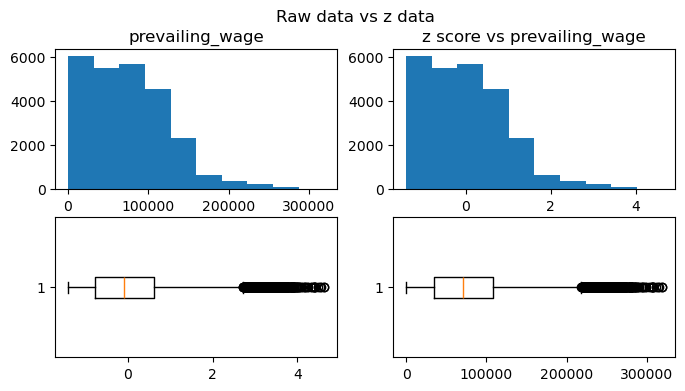

In [23]:
plt.figure(figsize=(8,4))
plt.suptitle('Raw data vs z data')
plt.subplot(2,2,1).hist(data)
plt.title('prevailing_wage')
plt.subplot(2,2,2).hist(z_wage)
plt.title('z score vs prevailing_wage')
plt.subplot(2,2,3).boxplot(z_wage,vert=False)
plt.subplot(2,2,4).boxplot(data,vert=False)
plt.show()

**StandardScaler**
- Skelearn
    - preprocessing
        - StandardScaler

In [32]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

ss.fit_transform(visa_df['prevailing_wage'])

ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

In [34]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
wage_ss = ss.fit_transform(visa_df[['prevailing_wage']])
visa_df['wage_ss'] = wage_ss

In [37]:
visa_df[['prevailing_wage','z_wage','wage_ss']]

,prevailing_wage,z_wage,wage_ss
0,592.2029,-1.398510,-1.398537
1,83425.6500,0.169832,0.169835
2,122996.8600,0.919060,0.919079
3,83434.0300,0.169991,0.169994
4,149907.3900,1.428576,1.428604
...,...,...,...
25475,77092.5700,0.049923,0.049924
25476,279174.7900,3.876083,3.876159
25477,146298.8500,1.360253,1.360280
25478,86154.7700,0.221504,0.221509


In [ ]:
visa_df
visa_df['prevailing_wage']
visa_df['prevailing_wage'].values
visa_df['prevailing_wage'].values.reshape(-1,1)

In [38]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
wage_ss = ss.fit_transform(visa_df['prevailing_wage'].values.reshape(-1,1))
wage_ss

array([[-1.39853722],
       [ 0.1698353 ],
       [ 0.91907852],
       ...,
       [ 1.36027953],
       [ 0.22150859],
       [-0.06776315]])

**MinMaxScaler**

In [41]:
pwage = visa_df['prevailing_wage']
Min = pwage.min()
Max = pwage.max()
Nr = pwage - Min
Dr = Max - Min
Wage_min_max = Nr/Dr
visa_df['Wage_min_max'] = Wage_min_max
Wage_min_max

0        0.001849
1        0.261345
2        0.385312
3        0.261371
4        0.469616
           ...   
25475    0.241505
25476    0.874579
25477    0.458311
25478    0.269895
25479    0.222033
Name: prevailing_wage, Length: 25480, dtype: float64

In [46]:
visa_df[['prevailing_wage','Wage_min_max']]

,prevailing_wage,Wage_min_max
0,592.2029,0.001849
1,83425.6500,0.261345
2,122996.8600,0.385312
3,83434.0300,0.261371
4,149907.3900,0.469616
...,...,...
25475,77092.5700,0.241505
25476,279174.7900,0.874579
25477,146298.8500,0.458311
25478,86154.7700,0.269895


**MinMaxScaler**

In [47]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
wage_mms = mms.fit_transform(visa_df[['prevailing_wage']])
visa_df['wage_mms'] = wage_mms

In [48]:
visa_df[['prevailing_wage','Wage_min_max','wage_mms']]

,prevailing_wage,Wage_min_max,wage_mms
0,592.2029,0.001849,0.001849
1,83425.6500,0.261345,0.261345
2,122996.8600,0.385312,0.385312
3,83434.0300,0.261371,0.261371
4,149907.3900,0.469616,0.469616
...,...,...,...
25475,77092.5700,0.241505,0.241505
25476,279174.7900,0.874579,0.874579
25477,146298.8500,0.458311,0.458311
25478,86154.7700,0.269895,0.269895
